In [1]:
import json
import glob, pickle

import numpy as np
import pandas as pd

from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('./train_lima_test_montreal.pk', 'rb') as in_file:
    dfs_train_lima = pickle.load(in_file)

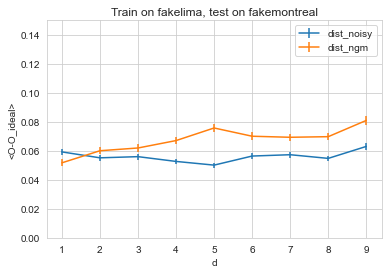

In [3]:
plt.style.use({'figure.facecolor':'white'})

N = 400

y_noisy_train = []
y_noisy_train_err = []
y_ngm_train = []
y_ngm_train_err = []
for depth in dfs_train_lima.keys():
    y_noisy_train.append(dfs_train_lima[depth]['dist_noisy'].mean())
    y_noisy_train_err.append(dfs_train_lima[depth]['dist_noisy'].std() / np.sqrt(N))
    y_ngm_train.append(dfs_train_lima[depth]['dist_ngm'].mean())
    y_ngm_train_err.append(dfs_train_lima[depth]['dist_ngm'].std() / np.sqrt(N))

plt.errorbar(np.arange(1, 10), y_noisy_train, y_noisy_train_err, label='dist_noisy')
plt.errorbar(np.arange(1, 10), y_ngm_train, y_ngm_train_err,  label='dist_ngm')
plt.ylim([0, 0.15])
plt.title('Train on fakelima, test on fakemontreal')
plt.ylabel('<O-O_ideal>')
plt.xlabel('d')
plt.legend()
plt.show()

In [4]:
with open('./train_montreal_finetune_montreal_test_montreal.pk', 'rb') as in_file:
    dfs_train_montreal = pickle.load(in_file)

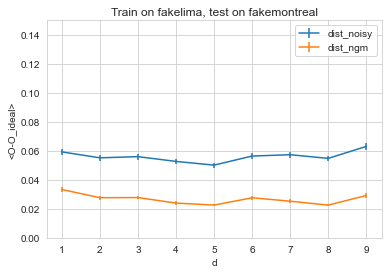

In [5]:
plt.style.use({'figure.facecolor':'white'})

N = 400

y_noisy_train = []
y_noisy_train_err = []
y_ngm_train = []
y_ngm_train_err = []
for depth in dfs_train_lima.keys():
    y_noisy_train.append(dfs_train_montreal[depth]['dist_noisy'].mean())
    y_noisy_train_err.append(dfs_train_montreal[depth]['dist_noisy'].std() / np.sqrt(N))
    y_ngm_train.append(dfs_train_montreal[depth]['dist_ngm'].mean())
    y_ngm_train_err.append(dfs_train_montreal[depth]['dist_ngm'].std() / np.sqrt(N))

plt.errorbar(np.arange(1, 10), y_noisy_train, y_noisy_train_err, label='dist_noisy')
plt.errorbar(np.arange(1, 10), y_ngm_train, y_ngm_train_err,  label='dist_ngm')
plt.ylim([0, 0.15])
plt.title('Train on fakelima, test on fakemontreal')
plt.ylabel('<O-O_ideal>')
plt.xlabel('d')
plt.legend()
plt.show()

In [6]:
dfs_all_finetune = {}
for n_samples in [1, 2, 5, 10, 15, 20, 50, 70, 100, 200, 300, 400]:
    with open(f'./train_lima_finetune_montreal_test_montreal_{n_samples}.pk', 'rb') as in_file:
        dfs_all_finetune[n_samples] = pickle.load(in_file)

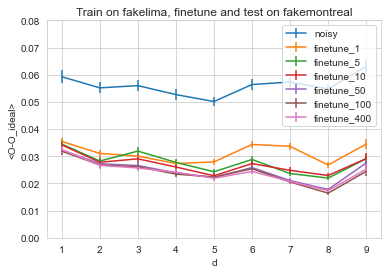

In [7]:
plt.style.use({'figure.facecolor':'white'})

n_samples = 1

y_noisy_ft = []
y_ngm_ft = []
y_noisy_ft_err = []
y_ngm_ft_err = []
for depth in range(1, 10):
    y_noisy_ft.append(dfs_all_finetune[n_samples][depth]['dist_noisy'].mean())
    y_noisy_ft_err.append(dfs_all_finetune[n_samples][depth]['dist_noisy'].std() / np.sqrt(N))
    y_ngm_ft.append(dfs_all_finetune[n_samples][depth]['dist_ngm'].mean())
    y_ngm_ft_err.append(dfs_all_finetune[n_samples][depth]['dist_ngm'].std() / np.sqrt(N))

plt.errorbar(np.arange(1, 10), y_noisy_ft, y_noisy_ft_err, label='noisy')
plt.errorbar(np.arange(1, 10), y_ngm_ft, y_ngm_ft_err, label=f'finetune_{n_samples}')
plt.ylim([0, 0.08])
plt.title('Train on fakelima, finetune and test on fakemontreal')
plt.ylabel('<O-O_ideal>')
plt.xlabel('d')
plt.legend()

for n_samples in [5, 10, 50, 100, 400]:
    y_noisy_ft = []
    y_ngm_ft = []
    y_noisy_ft_err = []
    y_ngm_ft_err = []
    for depth in range(1, 10):
        y_noisy_ft.append(dfs_all_finetune[n_samples][depth]['dist_noisy'].mean())
        y_noisy_ft_err.append(dfs_all_finetune[n_samples][depth]['dist_noisy'].std() / np.sqrt(N))
        y_ngm_ft.append(dfs_all_finetune[n_samples][depth]['dist_ngm'].mean())
        y_ngm_ft_err.append(dfs_all_finetune[n_samples][depth]['dist_ngm'].std() / np.sqrt(N))

    plt.errorbar(np.arange(1, 10), y_ngm_ft, y_ngm_ft_err, label=f'finetune_{n_samples}')
    plt.ylim([0, 0.08])
    plt.title('Train on fakelima, finetune and test on fakemontreal')
    plt.ylabel('<O-O_ideal>')
    plt.xlabel('d')
    plt.legend()

/var/folders/kj/mfqyg_tj77nf4gt67lvscdkw0000gn/T/ipykernel_66853/2840906544.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([str(x) for x in percent])


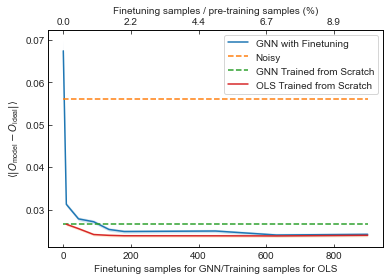

In [42]:
import matplotlib
matplotlib.rc('axes',edgecolor='black')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

x = [0, 1, 5, 10, 15, 20, 50, 70, 100]
y = []
yerr = []
at_depths_noisy = []
at_depths_ngm = []
at_depths_scratch = []
for depth in range(1, 10):
    at_depths_noisy += dfs_train_lima[depth]['dist_noisy'].tolist()
    at_depths_ngm += dfs_train_lima[depth]['dist_ngm'].tolist()
    at_depths_scratch += dfs_train_montreal[depth]['dist_ngm'].tolist()
y.append(np.mean(at_depths_ngm))
y_noisy = np.mean(at_depths_noisy)
y_scratch = np.mean(at_depths_scratch)
yerr.append(np.std(at_depths_ngm) / np.sqrt(N))
yerr_noisy = np.std(at_depths_noisy) / np.sqrt(N)

for n_samples in x[1:]:
    at_depths_ngm = []
    for depth in range(1, 10):
        at_depths_ngm += dfs_all_finetune[n_samples][depth]['dist_ngm'].tolist()
    y.append(np.mean(at_depths_ngm))
    yerr.append(np.std(at_depths_ngm) / np.sqrt(3600))

x = np.array(x) * 9
y = np.array(y)
yerr = np.array(yerr)
ax1.plot(x, y, label='GNN with Finetuning')
ax1.fill_between(x, y-yerr, y+yerr, alpha=0.2)
ax1.hlines(y_noisy, xmin=x[0], xmax=x[-1], linestyles='dashed', colors='C1', label='Noisy')
ax1.hlines(y_scratch, xmin=x[0], xmax=x[-1], linestyles='dashed', colors='C2', label='GNN Trained from Scratch')

################   OLS  ####################
y_scratch_ols = np.array(y_scratch_ols)
y_scratch_ols_err = np.array(y_scratch_ols_err)
ax1.plot(x[1:], y_scratch_ols, label='OLS Trained from Scratch', color='C3')
ax1.fill_between(x[1:], y_scratch_ols-y_scratch_ols_err, y_scratch_ols+y_scratch_ols_err, alpha=0.2)
############################################

ax2.hlines(y_scratch, xmin=x[0], xmax=x[-1], alpha=0)
ax1_ticks = ax1.get_xticks()
percent = np.round(np.array(ax1_ticks)/9000 * 100, 1)
ax2.set_xticklabels([str(x) for x in percent])
ax2.set_xlabel(r"Finetuning samples / pre-training samples (%)")

# plt.ylim([0, 0.08])
# plt.title('Train on fakelima, finetune and test on fakemontreal')
ax1.set_ylabel(r'$\langle|O_{\mathregular{model}}-O_{\mathregular{ideal}}|\rangle$')
ax1.set_xlabel('Finetuning samples for GNN/Training samples for OLS')
ax1.legend()

ax1.grid(False)
ax2.grid(False)
for tick in ax1.yaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
ax1.tick_params(axis='y',direction='in')
ax1.tick_params(axis='x',direction='in')
ax2.tick_params(axis='x',direction='in')
plt.show()

fig.savefig('./finetune_plot_b.pdf', format='pdf', dpi=300)

# OLS

In [16]:
import os, sys
from tqdm import tqdm
sys.path.append('../../')
from mlp import encode_data
from blackwater.data.utils import (
    get_backend_properties_v1,
)
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch
def load_circuits(data_dir, f_ext='.json', num_samples=1):
    circuits = []
    ideal_exp_vals = []
    noisy_exp_vals = []
    data_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith(f_ext)]
    for data_file in tqdm(data_files, leave=True):
        if f_ext == '.json':
            for entry in json.load(open(data_file, 'r')):
                circuits.append(QuantumCircuit.from_qasm_str(entry['circuit']))
                ideal_exp_vals.append(entry['ideal_exp_value'])
                noisy_exp_vals.append(entry['noisy_exp_values'])
        elif f_ext == '.pk':
            for entry in pickle.load(open(data_file, 'rb'))[:num_samples]:
                circuits.append(entry['circuit'])
                ideal_exp_vals.append(entry['ideal_exp_value'])
                noisy_exp_vals.append(entry['noisy_exp_values'])
    return circuits, ideal_exp_vals, noisy_exp_vals

In [17]:
from qiskit.providers.fake_provider import FakeMontreal
backend = FakeMontreal()
properties = get_backend_properties_v1(backend)

In [38]:
y_scratch_ols = []
y_scratch_ols_err = []
for num_samples in [1, 5, 10, 15, 20, 50, 70, 100]:
    train_circuits, train_ideal_exp_vals, train_noisy_exp_vals = load_circuits(
        '/Users/haoranliao/GitHub/blackwater/docs/tutorials/data/circ_parsed_pyg_data/train/', '.pk', num_samples=num_samples)
    print(len(train_circuits))

    test_circuits, test_ideal_exp_vals, test_noisy_exp_vals = load_circuits('/Users/haoranliao/GitHub/blackwater/docs/tutorials/data/circ_parsed_pyg_data/val/', '.pk', num_samples=100000)
    print(len(test_circuits))

    train_noisy_exp_vals = [x[0][0] for x in train_noisy_exp_vals]
    test_noisy_exp_vals = [x[0][0] for x in test_noisy_exp_vals]
    X_train, y_train = encode_data(train_circuits, properties, train_ideal_exp_vals, train_noisy_exp_vals, num_qubits=1)
    X_test, y_test = encode_data(test_circuits, properties, test_ideal_exp_vals, test_noisy_exp_vals, num_qubits=1)

    BATCH_SIZE = 32
    train_dataset = TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train))
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)
    test_dataset = TensorDataset(torch.Tensor(X_test), torch.Tensor(y_test))
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE*1000, shuffle=False)

    X_train = pd.DataFrame(X_train).iloc[:, -1:]
    y_train = pd.DataFrame(y_train)
    X_test = pd.DataFrame(X_test)
    y_test = pd.DataFrame(y_test)

    from sklearn.linear_model import LinearRegression
    ols = LinearRegression()
    ols.fit(X_train, y_train)

    ###############################
    distances = []

    for batch_X, batch_y in test_loader:
        out = ols.predict(batch_X[:, -1:])

        for ideal, noisy, ngm_mitigated in zip(
            batch_y.tolist(),
            batch_X[:, -1:].tolist(),
            out.tolist()
        ):
            ideal = np.mean(ideal)
            noisy = np.mean(noisy)
            ngm_mitigated = np.mean(ngm_mitigated)
            distances.append({
                "ideal": ideal,
                "noisy": noisy,
                "mitigated": ngm_mitigated,
                "dist_noisy": np.abs(ideal - noisy),
                "dist_ngm": np.abs(ideal - ngm_mitigated),
            })

    df = pd.DataFrame(distances)
    print(np.mean(df['dist_ngm']))
    y_scratch_ols.append(np.mean(df['dist_ngm']))
    y_scratch_ols_err.append(np.std(df['dist_ngm']) / np.sqrt(len(df['dist_ngm'])))

100%|██████████| 9/9 [00:05<00:00,  1.56it/s]


9


100%|██████████| 9/9 [00:02<00:00,  3.23it/s]


3600
0.026531558789995163


100%|██████████| 9/9 [00:06<00:00,  1.40it/s]


45


100%|██████████| 9/9 [00:02<00:00,  3.24it/s]


3600
0.025497488871785916


100%|██████████| 9/9 [00:06<00:00,  1.43it/s]


90


100%|██████████| 9/9 [00:02<00:00,  3.11it/s]


3600
0.024109235578459145


100%|██████████| 9/9 [00:06<00:00,  1.48it/s]


135


100%|██████████| 9/9 [00:02<00:00,  3.20it/s]


3600
0.02391778817566875


100%|██████████| 9/9 [00:05<00:00,  1.56it/s]


180


100%|██████████| 9/9 [00:01<00:00,  4.59it/s]


3600
0.02382204617578989


100%|██████████| 9/9 [00:06<00:00,  1.38it/s]


450


100%|██████████| 9/9 [00:02<00:00,  4.39it/s]


3600
0.023808682869914468


100%|██████████| 9/9 [00:05<00:00,  1.69it/s]


630


100%|██████████| 9/9 [00:02<00:00,  3.12it/s]


3600
0.023782734640901457


100%|██████████| 9/9 [00:05<00:00,  1.63it/s]


900


100%|██████████| 9/9 [00:02<00:00,  3.05it/s]


3600
0.023932400606030975


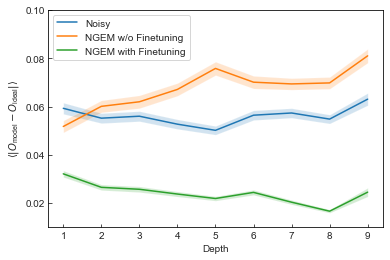

In [56]:
import matplotlib
matplotlib.rc('axes',edgecolor='black')

n_samples = 300

y_noisy_ft = []
y_ngm_ft = []
y_noisy_ft_err = []
y_ngm_ft_err = []
for depth in range(1, 10):
    y_noisy_ft.append(dfs_all_finetune[n_samples][depth]['dist_noisy'].mean())
    y_noisy_ft_err.append(dfs_all_finetune[n_samples][depth]['dist_noisy'].std() / np.sqrt(N))
    y_ngm_ft.append(dfs_all_finetune[n_samples][depth]['dist_ngm'].mean())
    y_ngm_ft_err.append(dfs_all_finetune[n_samples][depth]['dist_ngm'].std() / np.sqrt(N))

fig = plt.figure()

x = np.arange(1, 10)
y_noisy_ft = np.array(y_noisy_ft)
y_noisy_ft_err = np.array(y_noisy_ft_err)
y_ngm_train = np.array(y_ngm_train)
y_ngm_train_err = np.array(y_ngm_train_err)
y_ngm_ft = np.array(y_ngm_ft)
y_ngm_ft_err = np.array(y_ngm_ft_err)

alpha = 0.2

plt.plot(x, y_noisy_ft, label='Noisy')
plt.fill_between(x, y_noisy_ft-y_noisy_ft_err, y_noisy_ft+y_noisy_ft_err, alpha=alpha)
plt.plot(x, y_ngm_train, label='NGEM w/o Finetuning')
plt.fill_between(x, y_ngm_train-y_ngm_train_err, y_ngm_train+y_ngm_train_err, alpha=alpha)
plt.plot(x, y_ngm_ft, label='NGEM with Finetuning')
plt.fill_between(x, y_ngm_ft-y_ngm_ft_err, y_ngm_ft+y_ngm_ft_err, alpha=alpha)
plt.ylim([0.01, 0.1])
plt.ylabel(r'$\langle|O_{\mathregular{model}}-O_{\mathregular{ideal}}|\rangle$')
plt.xlabel('Depth')
ax = plt.gca()
ax.grid(False)
for tick in ax.xaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
for tick in ax.yaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
ax.tick_params(axis='y',direction='in')
ax.tick_params(axis='x',direction='in')
plt.legend()
plt.show()

fig.savefig('./finetune_plot_a.pdf', format='pdf', dpi=300)